# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# print cities list to reference
cities

['mataura',
 'airai',
 'dikson',
 'upernavik',
 'umm lajj',
 'mahebourg',
 'coquimbo',
 'bluff',
 'punta arenas',
 'manthani',
 'arraial do cabo',
 'faanui',
 'baculin',
 'qaanaaq',
 'lebu',
 'ferkessedougou',
 'kirakira',
 'kapaa',
 'shirvan',
 'ushuaia',
 'suhut',
 'novobirilyussy',
 'maneadero',
 'albany',
 'qaqortoq',
 'kahului',
 'hobart',
 'iqaluit',
 'barrow',
 'leningradskiy',
 'haines junction',
 'labuhan',
 'ostrovnoy',
 'norman wells',
 'bonavista',
 'klaksvik',
 'shimoda',
 'port alfred',
 'tuktoyaktuk',
 'butaritari',
 'gornyy',
 'lolua',
 'thompson',
 'zwedru',
 'borgarnes',
 'kuching',
 'rikitea',
 'port hardy',
 'atuona',
 'esperance',
 'comodoro rivadavia',
 'qasigiannguit',
 'lufilufi',
 'kodiak',
 'clyde river',
 'new norfolk',
 'miramar',
 'supata',
 'gayny',
 'vaini',
 'rusera',
 'tsihombe',
 'kenai',
 'port elizabeth',
 'honiara',
 'karratha',
 'paita',
 'bredasdorp',
 'ancud',
 'maple creek',
 'korla',
 'mwinilunga',
 'vaitupu',
 'providencia',
 'busselton',
 'ri

In [4]:
one_city_stats = pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

In [11]:
#testing my connection to Open Weather API with a single city:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

single_query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
single_weather_response = requests.get(single_query_url).json()
single_weather_response

single_city = single_weather_response['name']
city_lat = single_weather_response['coord']['lat']
city_lon = single_weather_response['coord']['lon']
temp_max = single_weather_response['main']['temp_max']
humidity = single_weather_response['main']['humidity']
cloudiness = single_weather_response['clouds']['all']
wind_speed = single_weather_response['wind']['speed']
country = single_weather_response['sys']['country']
date = single_weather_response['dt']

city_stats = [single_city, city_lat, city_lon, temp_max, humidity, cloudiness,
                  wind_speed, country,date]
print(city_stats)

one_city_stats = one_city_stats.append({
    'City':single_city,
    'Lat':city_lat,
    'Lng':city_lon,
    'Max Temp':temp_max,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
},ignore_index=True)

# check output type 
type(single_weather_response)

['Albany', 42.6001, -73.9662, 35.51, 73, 100, 5.01, 'US', 1676668759]


/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_50904/204770526.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  one_city_stats = one_city_stats.append({


dict

In [7]:
# check that only one city is included in this datframe
one_city_stats.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,35.37,73,100,5.01,US,1676668395


In [8]:
query_url =  base_url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
weather1_json = requests.get(query_url).json()
weather1_json

{'coord': {'lon': -73.9662, 'lat': 42.6001},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 31.17,
  'feels_like': 26.1,
  'temp_min': 28.89,
  'temp_max': 35.51,
  'pressure': 1005,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 333, 'gust': 15.99},
 'clouds': {'all': 100},
 'dt': 1676668759,
 'sys': {'type': 2,
  'id': 19530,
  'country': 'US',
  'sunrise': 1676634629,
  'sunset': 1676672974},
 'timezone': -18000,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_name = city_weather['name']
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 
              
            
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("Data not found in this row. skip the row...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | umm lajj
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | manthani
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | baculin
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | ferkessedougou
Processing Record 17 of Set 1 | kirakira
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | shirvan
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | suhut
Processing Record 22 of Set 1 | novobirilyussy
Processing Record 23 of Set 1 | maneadero
Proce

KeyboardInterrupt: 

In [14]:
#build the data frame before the for loop
city_w_df = pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

for city in cities:
    try:
        query_url =  url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        weather_json = requests.get(query_url).json()  
#variables for the dataframe
        city_name = weather_json['name']
        city_lat = weather_json['coord']['lat']
        city_lon = weather_json['coord']['lon']
        temp_max = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

#connecting the columns with the variables for our dataframe
        city_w_df = city_w_df.append({
        'City':city_name,
        'Lat':city_lat,
        'Lng':city_lon,
        'Max Temp':temp_max,
        'Humidity':humidity,
        'Cloudiness':cloudiness,
        'Wind Speed':wind_speed,
        'Country':country,
        'Date':date
        },ignore_index=True)
    except KeyError:
        print('not found')
    
city_w_df.head(20)

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#export to .csv
city_w_df.to_csv(output_data_file,
                  encoding="utf-8", index=False, header=True)

In [19]:
# Convert array of dictionaries to a pandas DataFrame.
weather_data_df = pd.DataFrame(city_data)
weather_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,59.49,65,14,2.73,NZ,1676669088
1,Airai,-8.9266,125.4092,59.52,87,100,1.05,TL,1676668925
2,Dikson,73.5069,80.5464,18.00,95,100,19.82,RU,1676669089
3,Upernavik,72.7868,-56.1549,-20.29,98,32,10.09,GL,1676669089
4,Umluj,25.0213,37.2685,69.37,45,100,17.60,SA,1676668926


In [20]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02
mean,17.811342,1.936924,49.046331,73.712230,58.956835,8.932014,1.676669e+09
std,37.460273,101.018286,34.119635,18.015792,40.105092,5.780553,1.169455e+02
min,-54.800000,-175.200000,-49.580000,13.000000,0.000000,0.000000,1.676669e+09
25%,-15.854700,-77.873600,28.535000,65.000000,20.000000,4.460000,1.676669e+09
50%,22.285500,-5.537100,61.270000,76.000000,75.000000,7.990000,1.676669e+09
75%,50.017700,91.154000,77.270000,88.000000,100.000000,12.390000,1.676669e+09
max,77.484000,178.416700,92.070000,100.000000,100.000000,27.830000,1.676669e+09


In [21]:
weather_data_df.count()

City          139
Lat           139
Lng           139
Max Temp      139
Humidity      139
Cloudiness    139
Wind Speed    139
Country       139
Date          139
dtype: int64

In [22]:
#Export the created dataframe to .csv file
weather_data_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#inspect the column types to make sure they are formatted correctly
city_w_df.dtypes


City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [24]:
# reformatting some columns from object to numeric

city_w_df['Humidity'] = pd.to_numeric(city_w_df['Humidity'])
city_w_df['Cloudiness'] = pd.to_numeric(city_w_df['Cloudiness'])
city_w_df['Date'] = pd.to_numeric(city_w_df['Date'])

In [25]:
city_w_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity       int64
Cloudiness     int64
Wind Speed    object
Country       object
Date           int64
dtype: object

In [26]:
#inspect the data
city_w_df.describe()

,Humidity,Cloudiness,Date
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [27]:

low_humidity_df = city_w_df.loc[city_w_df['Humidity']<100,:]
low_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [28]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_w_df.loc[city_w_df['Humidity']>100,:]
high_humidity.index

Index([], dtype='object')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_index =weather_data_df[(weather_data_df["Humidity"] >100)].index
weather_data_df.drop(city_index , inplace=True)
weather_data_df.head()
  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,59.49,65,14,2.73,NZ,1676669088
1,Airai,-8.9266,125.4092,59.52,87,100,1.05,TL,1676668925
2,Dikson,73.5069,80.5464,18.00,95,100,19.82,RU,1676669089
3,Upernavik,72.7868,-56.1549,-20.29,98,32,10.09,GL,1676669089
4,Umluj,25.0213,37.2685,69.37,45,100,17.60,SA,1676668926


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

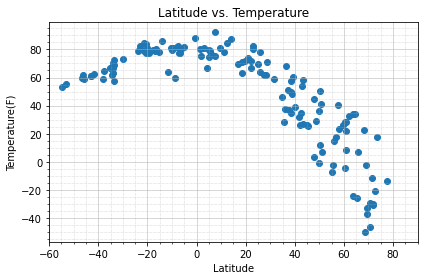

In [78]:
#Havent created the images file and change the command line
x_axis_data = weather_data_df["Lat"]
y_axis_data = weather_data_df["Max Temp"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,90)
plt.tight_layout()
#plot and show
plt.savefig("Images/latitude_v_temperature.png")
plt.show()

## Latitude vs. Humidity Plot

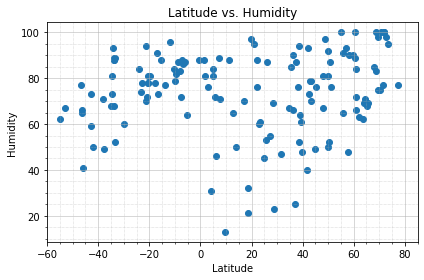

In [79]:
#Havent created the images file and change the command line
x_axis_data = weather_data_df["Lat"]
y_axis_data = weather_data_df["Humidity"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#save and plot 
plt.savefig("Images/latitude_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

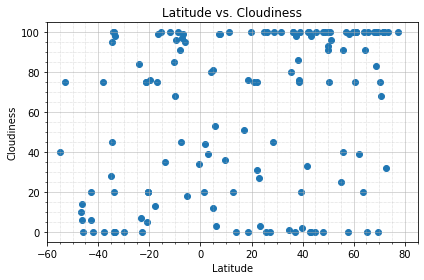

In [80]:
#Havent created the images file and change the command line
x_axis_data = weather_data_df["Lat"]
y_axis_data = weather_data_df["Cloudiness"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#Save and Plot
plt.savefig("Images/latitude_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

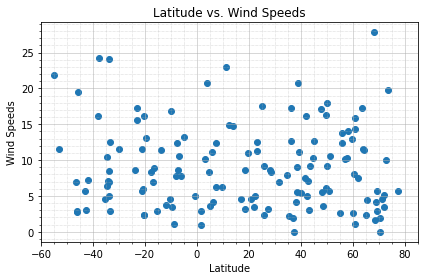

In [81]:
#Havent created the images file and change the command line
x_axis_data = weather_data_df["Lat"]
y_axis_data = weather_data_df["Wind Speed"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#save and plot
plt.savefig("Images/latitude_v_windspeed.png")
plt.show()

## Linear Regression

In [82]:
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,59.49,65,14,2.73,NZ,1676669088
1,Airai,-8.9266,125.4092,59.52,87,100,1.05,TL,1676668925
2,Dikson,73.5069,80.5464,18.00,95,100,19.82,RU,1676669089
3,Upernavik,72.7868,-56.1549,-20.29,98,32,10.09,GL,1676669089
4,Umluj,25.0213,37.2685,69.37,45,100,17.60,SA,1676668926
...,...,...,...,...,...,...,...,...,...
134,Bambous Virieux,-20.3428,57.7575,77.25,78,20,2.30,MU,1676669267
135,Sibolga,1.7427,98.7792,75.40,81,44,2.95,ID,1676669268
136,Hermanus,-34.4187,19.2345,61.81,81,45,10.40,ZA,1676668979
137,Puerto Ayora,-0.7393,-90.3518,87.76,88,34,5.01,EC,1676668979


In [83]:
#isolate hemisphere locations:
northern_lat = weather_data_df.loc[weather_data_df['Lat']>0,:]
southern_lat = weather_data_df.loc[weather_data_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8806657933916371


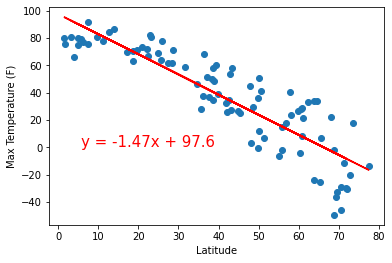

In [84]:
#plot chart
x_values = northern_lat['Lat']
y_values = northern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_lat_v_temp_north.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.8115033214395927


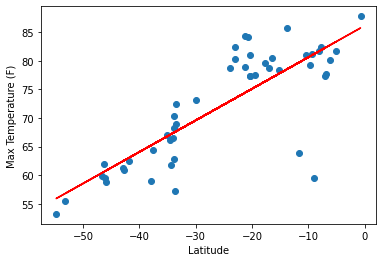

In [85]:
x_values = southern_lat['Lat']
y_values = southern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_temp_v_latitude_south.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.34470357200332113


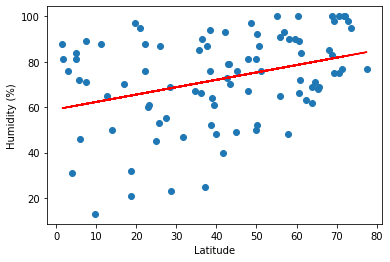

In [86]:

x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_humidity_north.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.5324120575300838


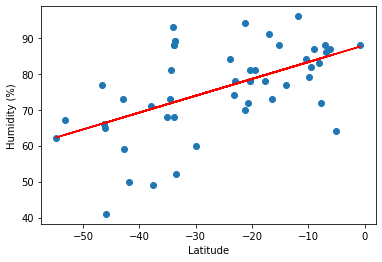

In [87]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_humidity_south.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.2762681787212502


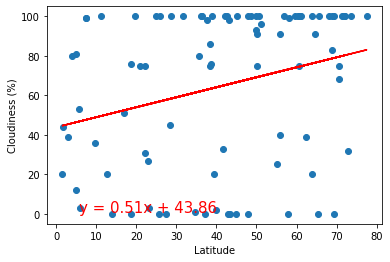

In [88]:
x_values = northern_lat['Lat']
y_values = northern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_cloudiness_north.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.4188961258433572


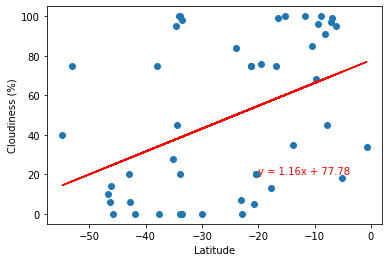

In [89]:
x_values = southern_lat['Lat']
y_values = southern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_cloudiness_south.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.022473379948502688


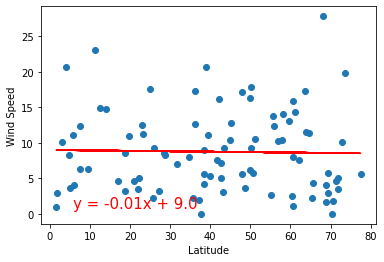

In [90]:
x_values = northern_lat['Lat']
y_values = northern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_ws_north.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.1732119990726697


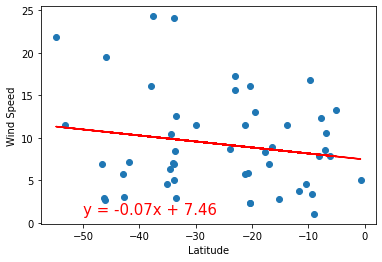

In [91]:
x_values = southern_lat['Lat']
y_values = southern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept

#this is all formatting, adding the line to our plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r value is {st.pearsonr(y_values,x_values)[0]}')
plt.savefig("Images/lin_reg_latitude_v_ws_south.png")
plt.show()